In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Reading dataset

# Descripción de Características

- **id**: Esta columna parece ser un identificador para cada entrada en el conjunto de datos. Probablemente sirve como un identificador único para cada registro.

- **member_id**: Otro identificador, posiblemente representando un identificador único para los miembros asociados con cada préstamo.

- **loan_amnt**: Esta columna representa la cantidad del préstamo solicitado por el prestatario.

- **funded_amnt**: La cantidad real del préstamo financiado por el prestamista al prestatario.

- **funded_amnt_inv**: La cantidad del préstamo financiado por inversores.

- **term**: La duración del préstamo, generalmente en meses.

- **int_rate**: La tasa de interés sobre el préstamo, representada como un porcentaje.

- **installment**: El pago mensual que debe hacer el prestatario.

- **emp_length**: La duración del tiempo que el prestatario ha estado empleado.

- **home_ownership**: El tipo de propiedad de vivienda (por ejemplo, ALQUILER, PROPIO, HIPOTECA).

- **annual_inc**: El ingreso anual del prestatario.

- **verification_status**: Indica si el ingreso del prestatario fue verificado por la plataforma.

- **issue_d**: La fecha en que se emitió el préstamo.

- **loan_status**: El estado actual del préstamo (por ejemplo, Actual, Pagado Por Completo, Cobrado).

- **purpose**: El propósito del préstamo tal como lo declaró el prestatario.

- **title**: Un título proporcionado por el prestatario para la solicitud de préstamo.

- **zip_code**: Los primeros tres dígitos del código postal del prestatario.

- **addr_state**: El estado de la dirección del prestatario.

- **dti**: Proporción deuda-ingreso, representando los pagos totales mensuales de deuda del prestatario divididos por su ingreso bruto mensual.

- **delinq_2yrs**: El número de moras de más de 30 días en el historial de crédito del prestatario.

- **earliest_cr_line**: La fecha en que se abrió la línea de crédito más antigua reportada del prestatario.

- **inq_last_6mths**: El número de solicitudes de acreedores en los últimos 6 meses.

- **open_acc**: El número de líneas de crédito abiertas en el historial de crédito del prestatario.

- **pub_rec**: El número de registros públicos denigratorios (declaraciones de quiebra, gravámenes fiscales o sentencias) en el informe de crédito del prestatario.

- **revol_bal**: Balance total de crédito giratorio (saldo sin pagar al final del ciclo de facturación de la tarjeta de crédito).

- **revol_util**: Tasa de utilización de la línea de crédito giratoria, o la cantidad de crédito que está utilizando el prestatario en relación con su crédito giratorio disponible total.

- **total_acc**: El número total de líneas de crédito actualmente en el historial de crédito del prestatario.

- **total_pymnt**: Cantidad total pagada hasta la fecha.

- **total_pymnt_inv**: Cantidad total pagada hasta la fecha por inversores.

- **total_rec_prncp**: Principal total recibido hasta la fecha.

- **total_rec_int**: Interés total recibido hasta la fecha.

- **last_pymnt_d**: Fecha del último pago recibido.

- **last_pymnt_amnt**: Monto total del último pago recibido.

- **next_pymnt_d**: Fecha programada del próximo pago.

- **last_credit_pull_d**: Mes más reciente en que se extrajo el crédito LC para este préstamo.

- **repay_fail**: Un indicador binario (0 o 1) que indica si falló el reembolso del préstamo.


In [231]:
data =pd.read_csv('../data/Anonymize_Loan_Default_data.csv', encoding='Latin1', index_col='id').drop(columns=['member_id', 'Unnamed: 0'])
print(data.shape)
data.head()


(38480, 34)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,Jan-01,0.0,NaN,0.0,0.0,0.0,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
545583,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
532101,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
877788,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
875406,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [232]:
data.groupby('loan_status')['repay_fail'].mean()

loan_status
Charged Off                                            1.0
Current                                                0.0
Default                                                1.0
Does not meet the credit policy. Status:Charged Off    1.0
Does not meet the credit policy. Status:Fully Paid     0.0
Fully Paid                                             0.0
In Grace Period                                        0.0
Late (16-30 days)                                      1.0
Late (31-120 days)                                     1.0
Name: repay_fail, dtype: float64

In [233]:
#procesando variable con mal formato
data['revol_util'] = data['revol_util'].str.replace('%', '') \
                        .str.replace('\x930.00\x94', '0') \
                        .str.replace('\x93100.00\x94', '0')
data['revol_util'] = data['revol_util'].astype(float)

In [234]:
## Variables que no tienen sentido en un modelo predictivo inicialmente, con mas tiempo se podria hacer un buen trabajo con estas fechas
drop_vars = ['last_pymnt_d', 'zip_code', 'issue_d', 'earliest_cr_line', 'next_pymnt_d','last_credit_pull_d', 'loan_status']
data = data.drop(columns=drop_vars)

La variable Loan Status esta directamente relacionada con el repail fill, por tanto no tiene sentido en un modelo predictivo agregarla pues seria como poner la Y en las X

## Target umbalancing

<Axes: xlabel='repay_fail'>

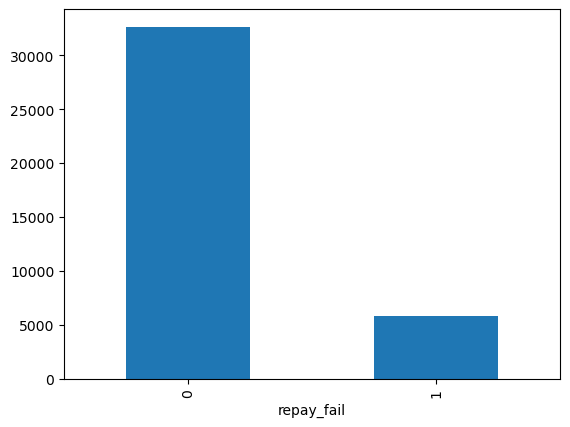

In [235]:
data['repay_fail'].value_counts().plot(kind='bar')

## NA values

In [236]:
## Vars with na
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

data[vars_with_na].isnull().mean()

loan_amnt                 0.000026
funded_amnt               0.000026
funded_amnt_inv           0.000026
installment               0.000026
emp_length                0.025806
annual_inc                0.000052
delinq_2yrs               0.000026
inq_last_6mths            0.000026
mths_since_last_delinq    0.633134
open_acc                  0.000026
pub_rec                   0.000026
revol_bal                 0.000104
revol_util                0.001533
total_acc                 0.000026
total_pymnt               0.000026
total_pymnt_inv           0.000026
total_rec_prncp           0.000026
total_rec_int             0.000026
last_pymnt_amnt           0.000026
dtype: float64

In [237]:
data[vars_with_na]

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
id,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.00000,0.00,< 1 year,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00
545583,2500.0,2500.0,2500.00000,85.42,4 years,20004.0,0.0,5.0,NaN,7.0,0.0,981.0,21.3,10.0,3075.291779,3075.29,2500.00,575.29,90.85
532101,5000.0,5000.0,5000.00000,175.67,4 years,59000.0,0.0,1.0,59.0,7.0,0.0,18773.0,99.9,15.0,2948.760000,2948.76,1909.02,873.81,175.67
877788,7000.0,7000.0,7000.00000,225.58,10+ years,53796.0,3.0,3.0,3.0,7.0,0.0,3269.0,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27
875406,2000.0,2000.0,2000.00000,60.32,10+ years,30000.0,0.0,0.0,72.0,7.0,0.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849205,3000.0,3000.0,3000.00000,99.63,3 years,74250.0,0.0,2.0,NaN,12.0,0.0,16550.0,73.5,22.0,3586.619764,3586.62,3000.00,586.62,100.30
852914,10400.0,10400.0,10400.00000,352.88,9 years,62000.0,0.0,1.0,NaN,21.0,0.0,16898.0,39.7,33.0,12703.534030,12703.53,10400.00,2303.53,393.08
519553,16000.0,10550.0,10531.35818,250.77,10+ years,95088.0,0.0,1.0,NaN,9.0,1.0,10386.0,62.2,25.0,14202.267530,14163.31,10550.00,3652.27,5439.96


In [238]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O' and 'repay_fail' not in var]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  20


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
id,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0.00,0.00,0.00
545583,2500.0,2500.0,2500.0,13.98,85.42,20004.0,19.86,0.0,5.0,NaN,7.0,0.0,981.0,21.3,10.0,3075.291779,3075.29,2500.00,575.29,90.85
532101,5000.0,5000.0,5000.0,15.95,175.67,59000.0,19.57,0.0,1.0,59.0,7.0,0.0,18773.0,99.9,15.0,2948.760000,2948.76,1909.02,873.81,175.67
877788,7000.0,7000.0,7000.0,9.91,225.58,53796.0,10.80,3.0,3.0,3.0,7.0,0.0,3269.0,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,1550.27
875406,2000.0,2000.0,2000.0,5.42,60.32,30000.0,3.60,0.0,0.0,72.0,7.0,0.0,0.0,0.0,15.0,2161.663244,2161.66,2000.00,161.66,53.12


In [239]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [240]:
def analyse_discrete_vars(var):
    data.groupby(var)['repay_fail'].mean().plot(kind='bar')
    plt.show()
    data[var].value_counts().plot(kind='bar')
    plt.show()

In [241]:
discrete_vars

['delinq_2yrs', 'pub_rec']

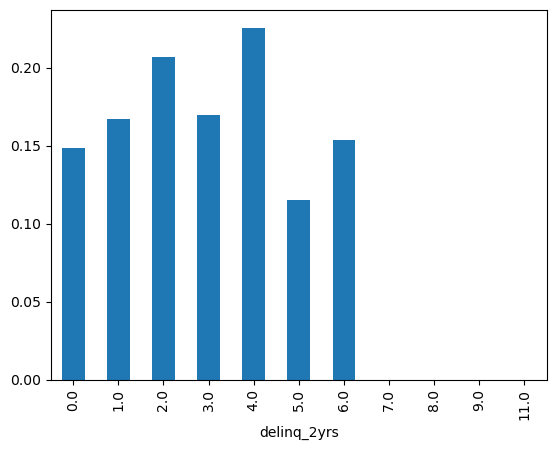

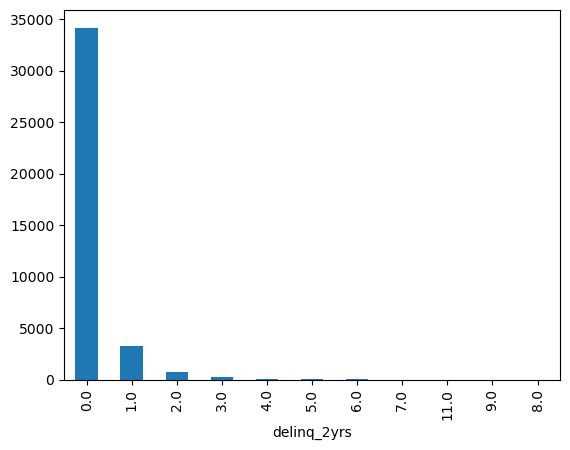

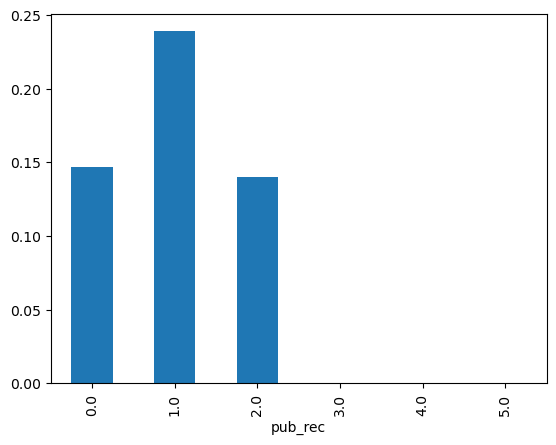

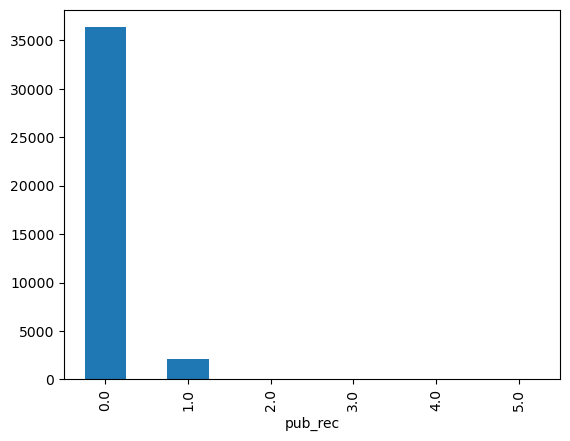

In [242]:
for var in discrete_vars:
    analyse_discrete_vars(var)

Las variables discretas al estar tan infladas de ceros, la volveré binaria 

In [243]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


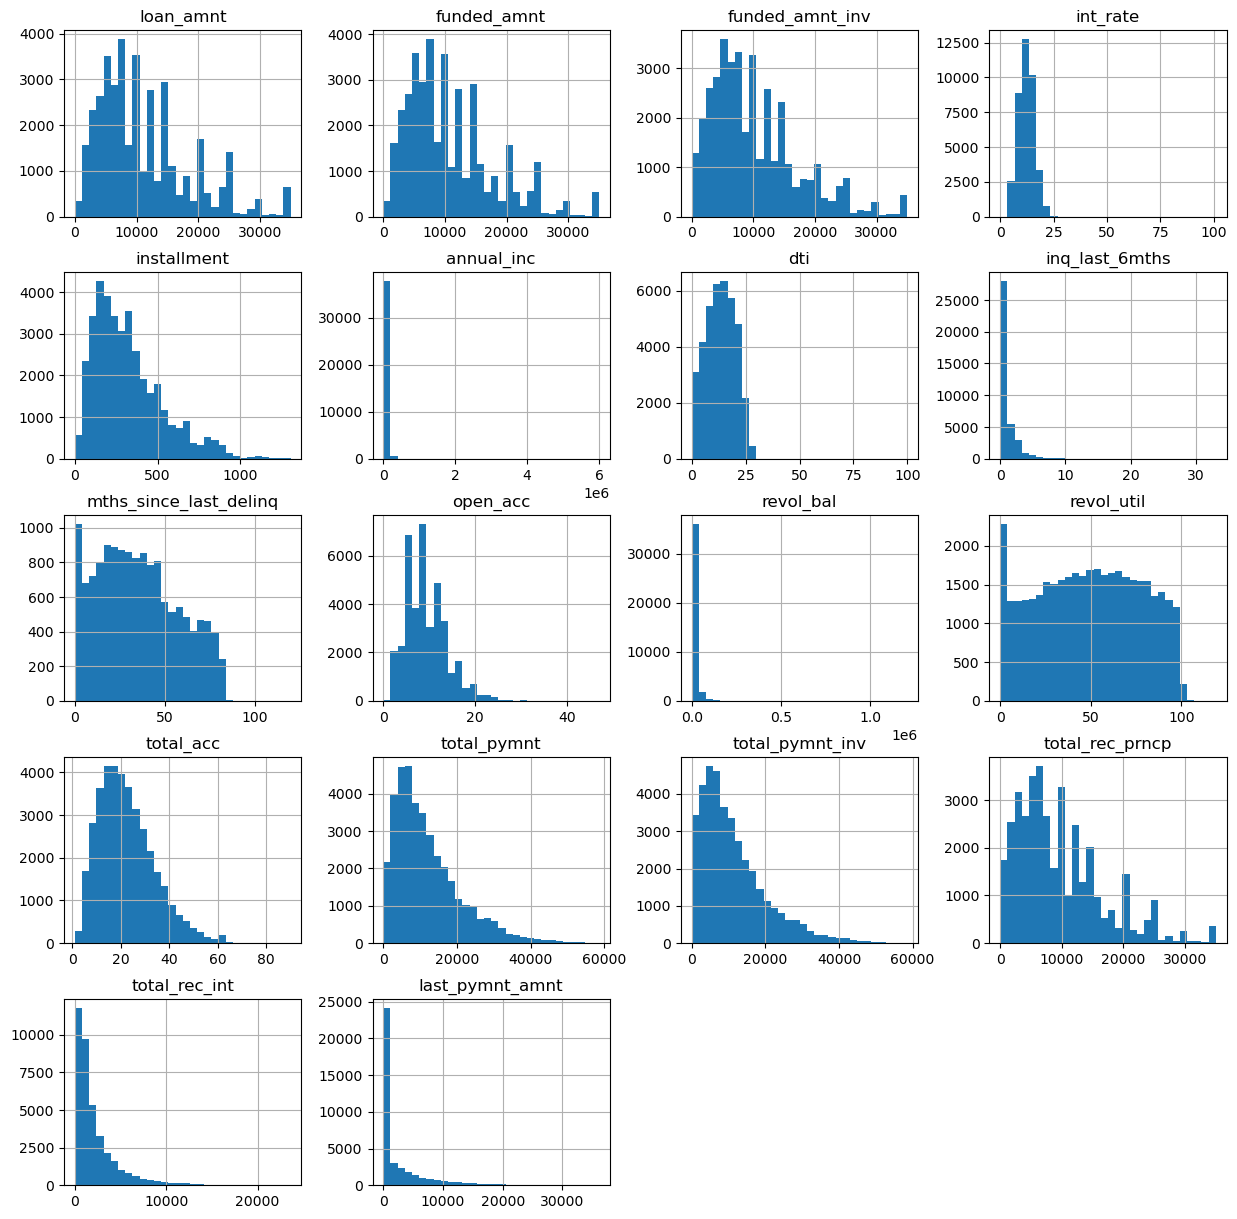

In [244]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
from scipy import stats
tmp = data.copy() 
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

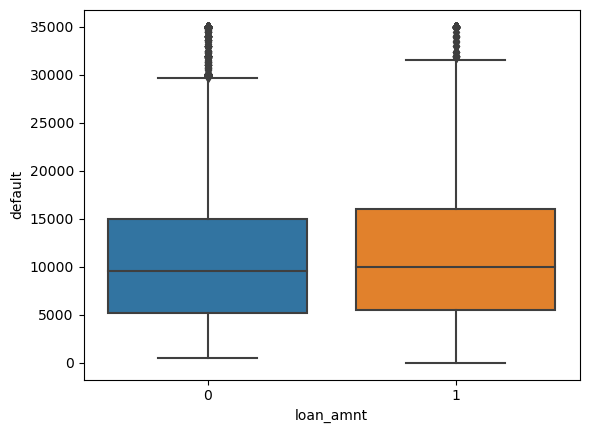

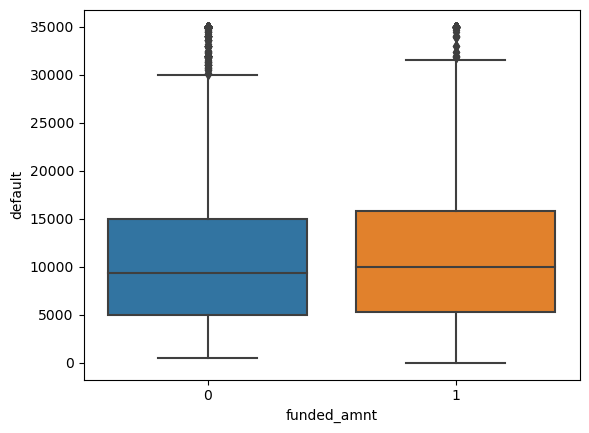

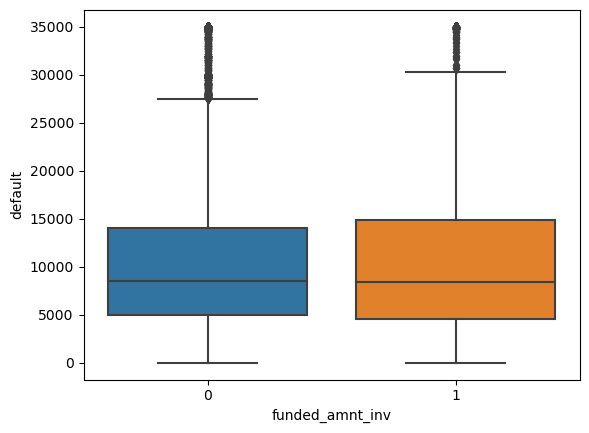

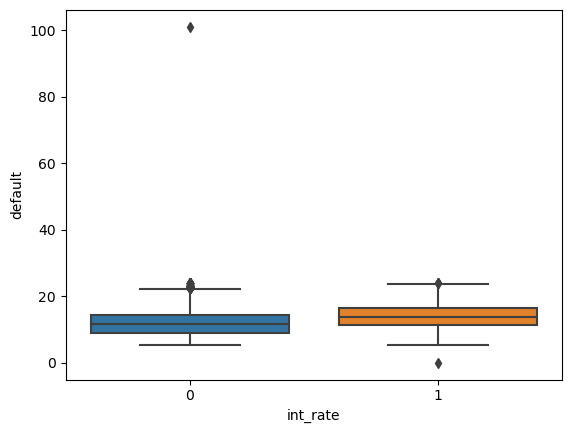

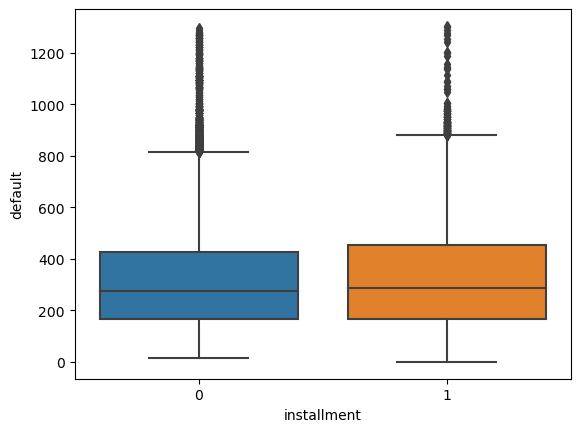

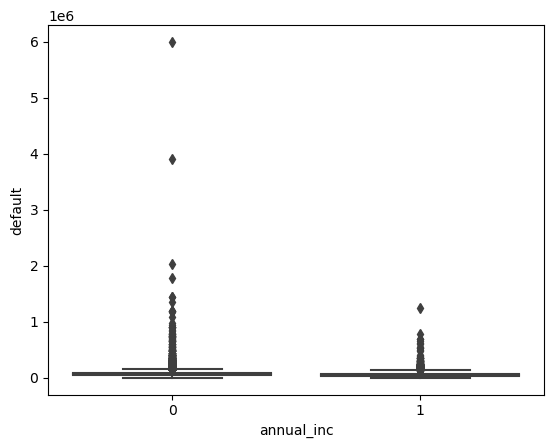

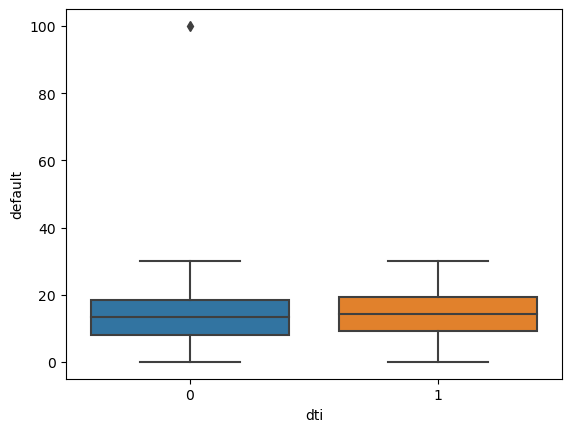

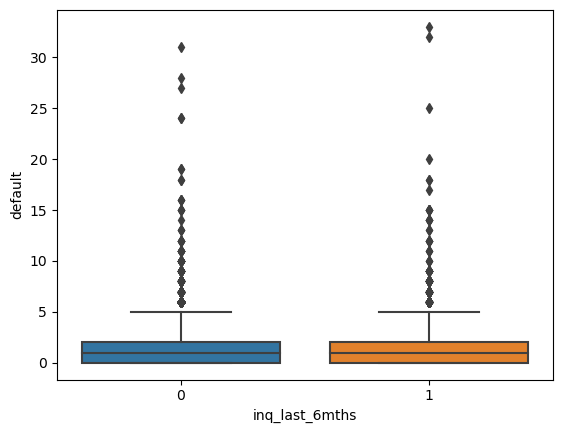

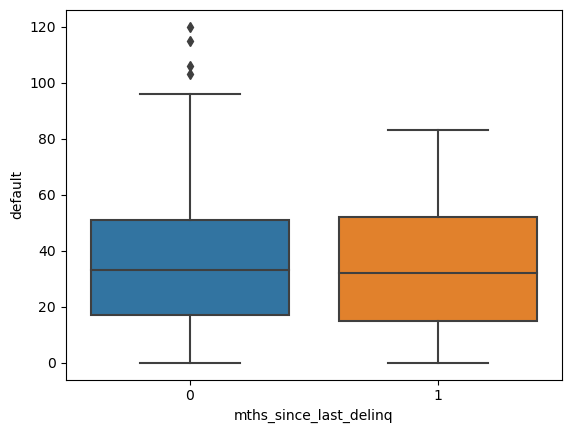

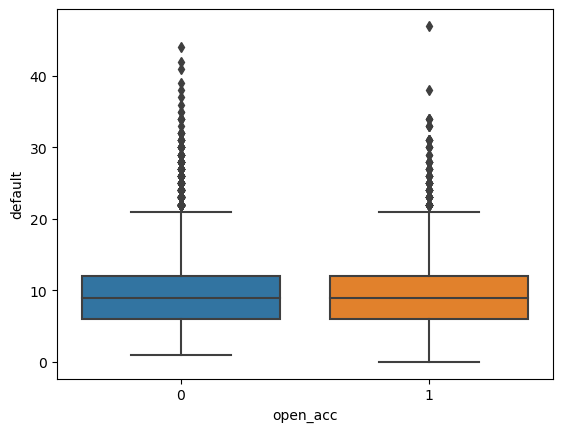

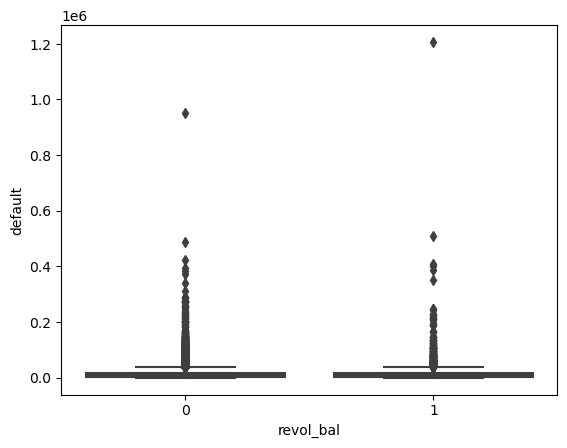

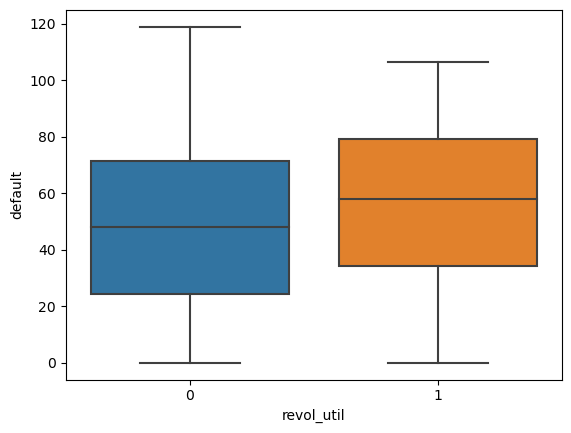

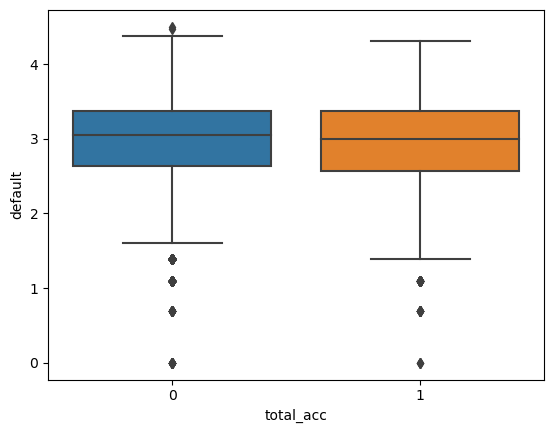

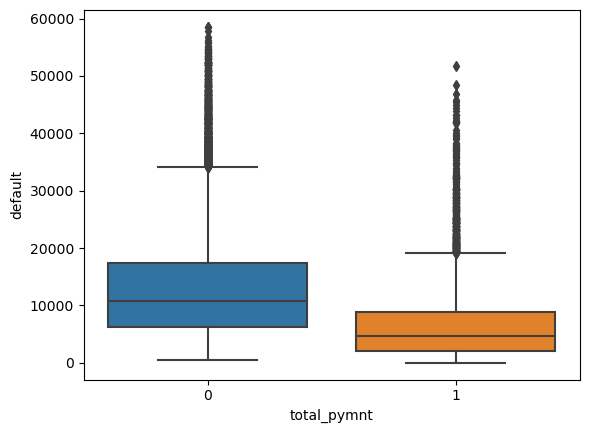

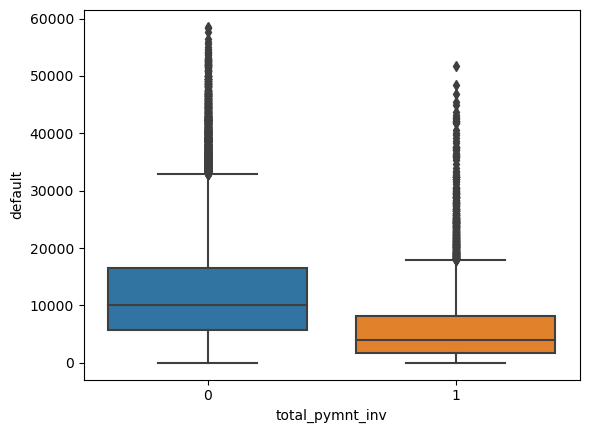

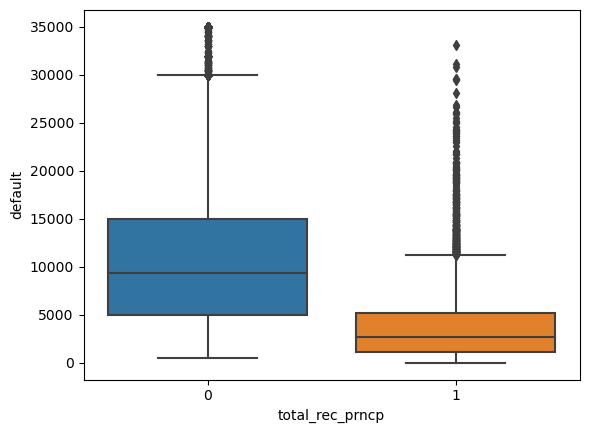

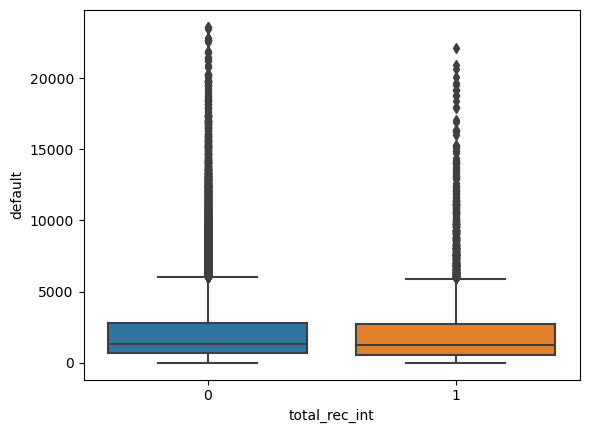

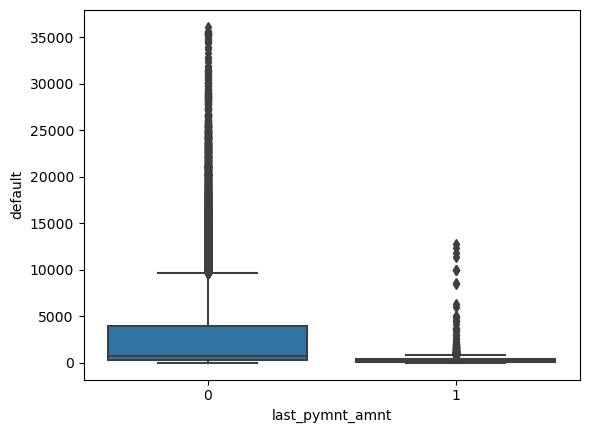

In [245]:
# let's explore the relationship between the house price and
# the transformed variables with more detail:
import seaborn as sns

def analyse_continuous_default(df, var):
    df = df.copy()
        # log does not take negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
    # plot
    sns.boxplot(data=df,x=df['repay_fail'], y=df[var])
    plt.ylabel('default')
    plt.xlabel(var)
    plt.show()


for var in cont_vars:
    analyse_continuous_default(data, var)

monto y c deben tener transformacion logaritmica

In [246]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O' and 'fecha' not in var]

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  6


In [247]:
cat_vars

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state']

In [248]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['repay_fail'].count() / len(df)


    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

Series([], Name: repay_fail, dtype: float64)

Series([], Name: repay_fail, dtype: float64)

home_ownership
NONE     0.000104
OTHER    0.003248
Name: repay_fail, dtype: float64

Series([], Name: repay_fail, dtype: float64)

purpose
renewable_energy    0.002365
vacation            0.009356
Name: repay_fail, dtype: float64

addr_state
AA    0.000026
AK    0.002001
AR    0.006185
DC    0.005094
DE    0.003222
HI    0.004366
IA    0.000312
ID    0.000208
IN    0.000494
KS    0.007043
KY    0.008134
ME    0.000078
MS    0.000624
MT    0.002287
NE    0.000260
NH    0.004418
NM    0.004834
OK    0.007380
RI    0.004834
SD    0.001481
TN    0.000780
UT    0.006601
VT    0.001351
WV    0.004314
WY    0.002027
ZZ    0.000026
Name: repay_fail, dtype: float64



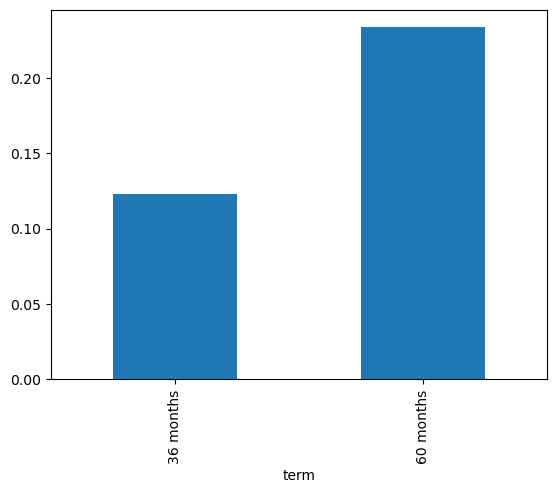

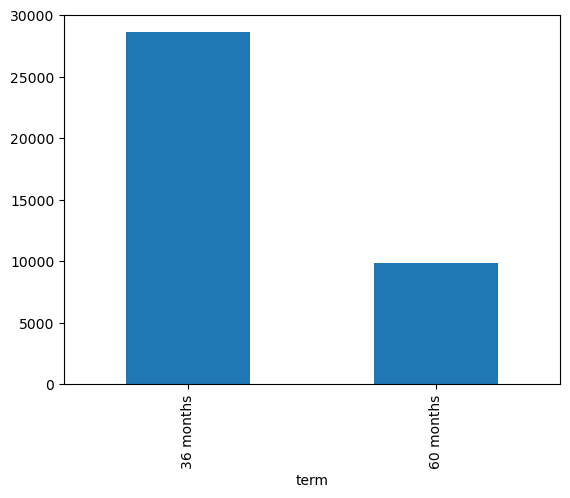

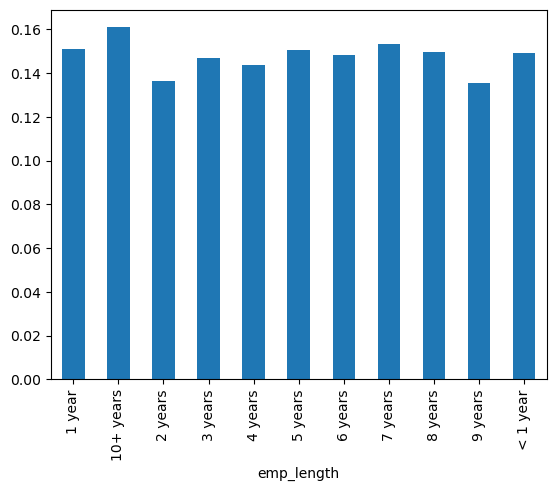

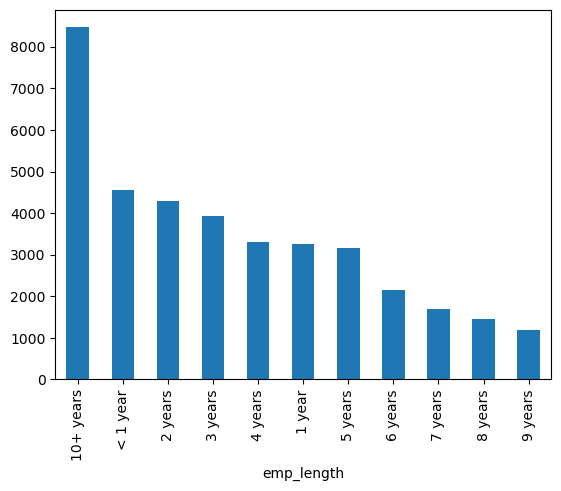

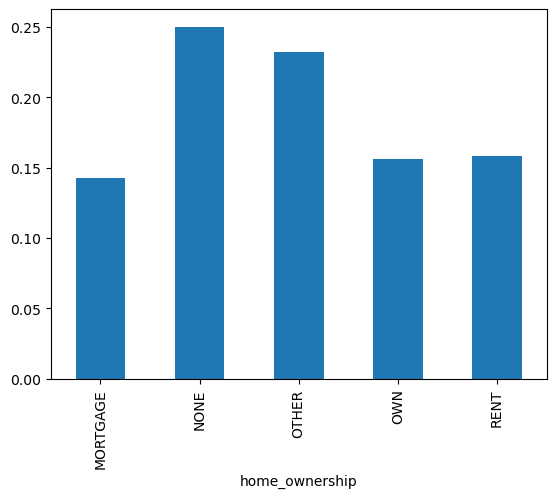

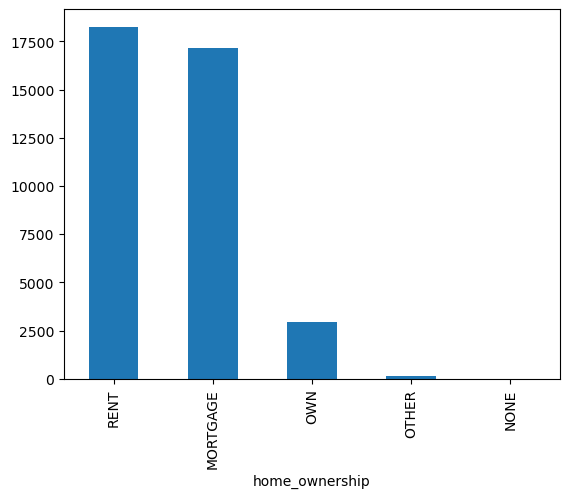

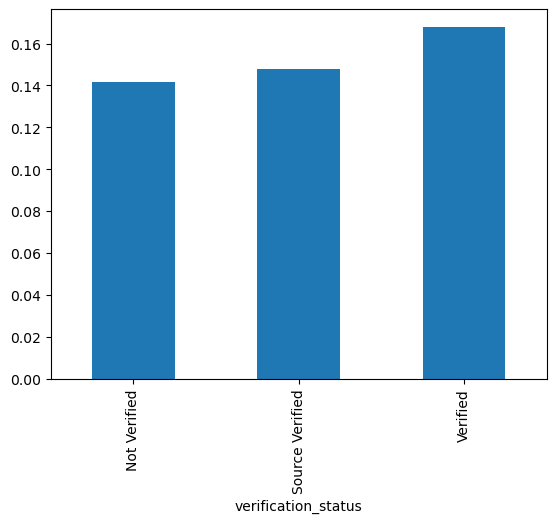

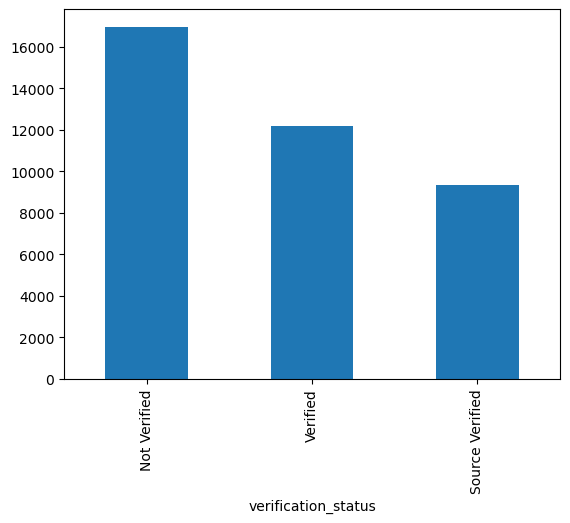

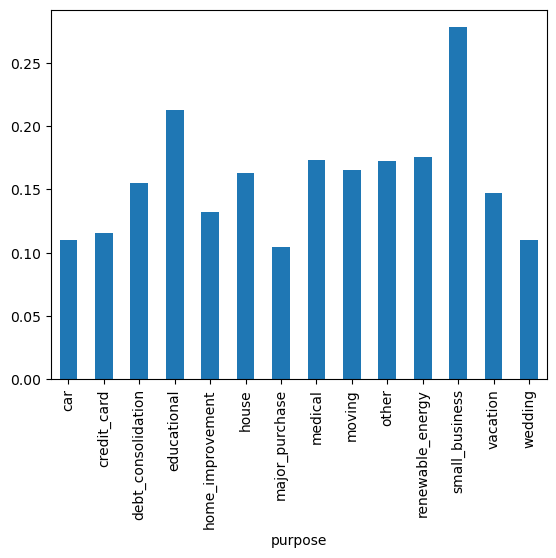

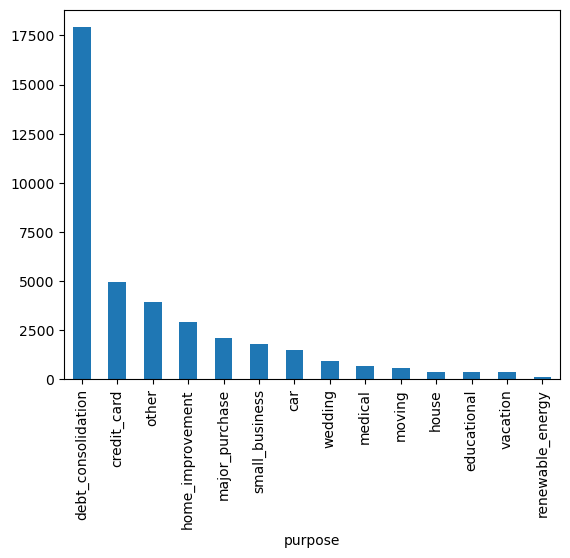

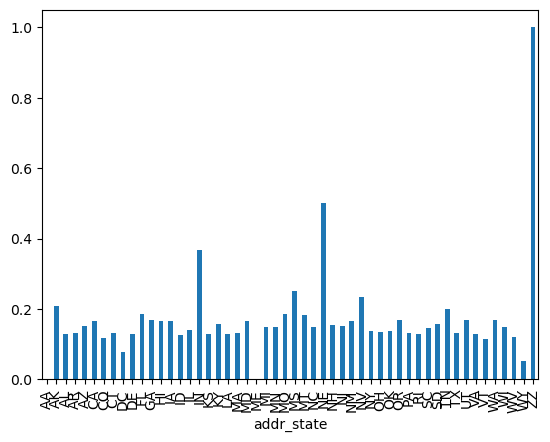

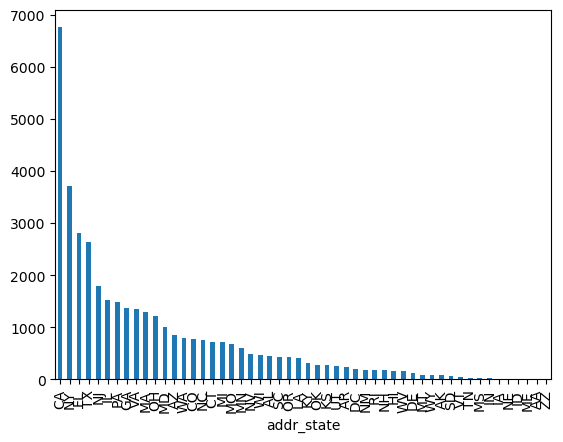

In [249]:
for var in cat_vars:
    # we can re-use the function to determine median
    # sale price, that we created for discrete variables

    analyse_discrete_vars(var)

In [250]:
data.to_csv('../data/processed/mdt.csv')